<table style="width:100%;">
  <tr>
    <td style="text-align:left; width:33%;">
      <img src="./logo/univ.png" alt="Logo gauche" width="200">
    </td>
    <td style="text-align:center; width:33%;">
      <img src="./logo/but-sd.png" alt="Logo centre" width="200">
    </td>
    <td style="text-align:right; width:33%;">
      <img src="./logo/iut-villetaneuse.png" alt="Logo droite" width="320">
    </td>
  </tr>
</table>

---

**Rapport d'Analyse : Diagnostic Prédictif des Tumeurs Mammaires**

- **Nom :** BENKHERFELLAH  
- **Prénom :** Ibrahim 

**Département** : Science des Données\
**Établissement :** IUT de Villeuniversité > Université Sorbonne Paris Nord

**Date** : Mai 2025

---

In [1]:
# --- Pallette de couleurs ---
vert = "#5FC2BA"
bleu = "#3B556D"

In [2]:
# --- Bibliothèques ---
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr

In [3]:
# DataFrame --> Importation des donneés depuis le CSV
df = pd.read_csv("../data/data.csv")

In [4]:
# --- Point Info ---
print(
    f"Le fichier data comporte {df.shape[0]} lignes\nAinsi que {df.shape[1]} colonnes"
)

Le fichier data comporte 569 lignes
Ainsi que 32 colonnes


# Dictionnaire des Données et Métriques

## Identification des patients et cibles

| Colonne                        | Traduction en français                 | Description                                                                 |
|-------------------------------|----------------------------------------|-----------------------------------------------------------------------------|
| `id`                          | Identifiant                            | Numéro unique d'identification du patient.                                 |
| `diagnosis`                   | Diagnostic                             | Résultat du diagnostic : M = Malin (cancer), B = Bénin (non cancéreux).    |

## Indicateurs morphologiques

### Moyennes des mesures (`*_mean`)

| Colonne                        | Traduction en français                   | Description                                                                 |
|-------------------------------|------------------------------------------|-----------------------------------------------------------------------------|
| `radius_mean`                 | Rayon moyen                              | Distance moyenne du centre vers le bord de la tumeur.                      |
| `texture_mean`               | Texture moyenne                          | Variation des niveaux de gris (granularité de l’image).                    |
| `perimeter_mean`             | Périmètre moyen                          | Périmètre moyen de la tumeur.                                              |
| `area_mean`                  | Surface moyenne                          | Surface occupée par la tumeur.                                             |
| `smoothness_mean`           | Lissage moyen                            | Régularité des contours.                                                  |
| `compactness_mean`          | Compacité moyenne                        | Mesure de la compacité des contours.                                       |
| `concavity_mean`            | Concavité moyenne                        | Gravité des zones concaves dans les contours de la tumeur.                |
| `concave points_mean`       | Points concaves moyens                  | Nombre moyen de points concaves.                                           |
| `symmetry_mean`             | Symétrie moyenne                         | Mesure de la symétrie de la tumeur.                                        |
| `fractal_dimension_mean`    | Dimension fractale moyenne               | Complexité du contour (valeurs proches de 1 indiquent une forme simple).   |

### Variabilité des mesures (`*_se`)

| Colonne                        | Traduction en français                   | Description                                                                 |
|-------------------------------|------------------------------------------|-----------------------------------------------------------------------------|
| `radius_se`                   | Écart-type du rayon                      | Variation du rayon.                                                         |
| `texture_se`                 | Écart-type de la texture                 | Variation de la texture.                                                    |
| `perimeter_se`               | Écart-type du périmètre                  | Variation du périmètre.                                                     |
| `area_se`                    | Écart-type de la surface                 | Variation de la surface.                                                    |
| `smoothness_se`             | Écart-type du lissage                   | Variation du lissage.                                                       |
| `compactness_se`            | Écart-type de la compacité              | Variation de la compacité.                                                  |
| `concavity_se`              | Écart-type de la concavité              | Variation de la concavité.                                                  |
| `concave points_se`         | Écart-type des points concaves          | Variation du nombre de points concaves.                                     |
| `symmetry_se`               | Écart-type de la symétrie               | Variation de la symétrie.                                                   |
| `fractal_dimension_se`      | Écart-type de la dimension fractale     | Variation de la dimension fractale.                                         |

### Valeurs critiques (`*_worst`)

| Colonne                        | Traduction en français                   | Description                                                                 |
|-------------------------------|------------------------------------------|-----------------------------------------------------------------------------|
| `radius_worst`               | Rayon maximal                            | Valeur maximale du rayon.                                                   |
| `texture_worst`             | Texture maximale                         | Valeur maximale de la texture.                                              |
| `perimeter_worst`           | Périmètre maximal                        | Valeur maximale du périmètre.                                               |
| `area_worst`                | Surface maximale                         | Surface maximale occupée.                                                   |
| `smoothness_worst`         | Lissage maximal                          | Lissage maximal observé.                                                    |
| `compactness_worst`        | Compacité maximale                       | Valeur maximale de la compacité.                                            |
| `concavity_worst`          | Concavité maximale                       | Valeur maximale de la concavité.                                            |
| `concave points_worst`     | Points concaves maximaux                 | Nombre maximal de points concaves.                                          |
| `symmetry_worst`           | Symétrie maximale                        | Symétrie maximale observée.                                                 |
| `fractal_dimension_worst`  | Dimension fractale maximale              | Complexité maximale du contour.                                             |


---

# Analyse Exploratoire

## Répartition des classes cibles (Diagnostic)

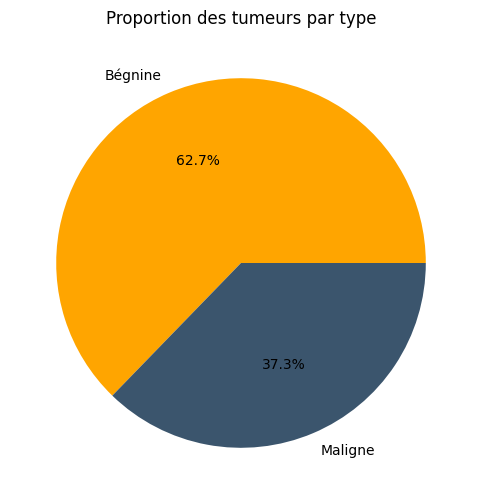

In [5]:
# On compte les valeurs du diagnostic
diagnosis_counts = df["diagnosis"].value_counts()

# --- Pie chart ---
part_tumeurs = diagnosis_counts.plot(
    kind="pie",
    autopct="%1.1f%%",
    figsize=(6, 6),
    labels=["Bégnine", "Maligne"],
    colors=["orange", bleu],
    title="Proportion des tumeurs par type",
    ylabel="",
)

<p style="text-align:justify;">Via le diagramme circulaire ci-dessus, nous voyons que près de 62.7% des patients de notre jeu de données sont atteints d'une tumeurs de type Bégigne tandis que 37.3% sont atteint de tumeurs maligne.</p>

<p style="text-align:justify;">Une tumeur est dite Bégnine si elle n'est pas conséreuse, il s'agit d'une masse qui ne se propage pas à d'autres parties du corps. À l'inverse, une tumeur maligne est conséreuse et elle envahit les tissus voisins.</p>

Ici, on voit bien que la mojirité ne sont pas concéreuses.

## Distribution globale du rayon moyen des tumeurs

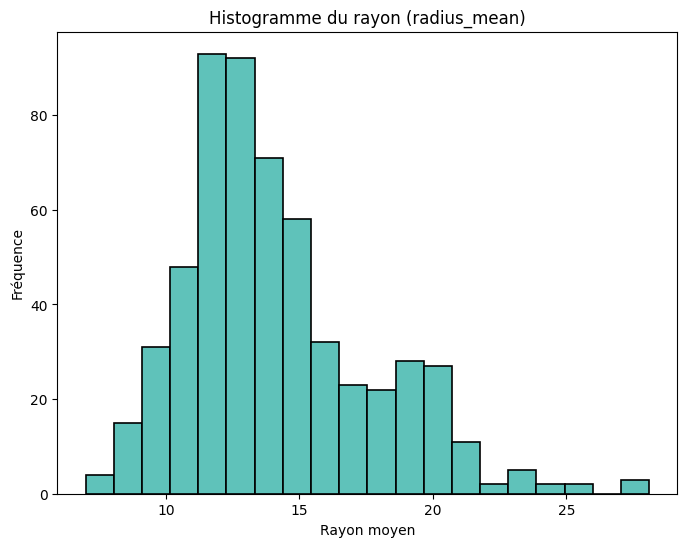

In [6]:
# On sélectionne la colonne `radius_mean`
radius_mean = df["radius_mean"]

# Création du Graphique
radius_mean_plot = radius_mean.plot(
    kind="hist",
    figsize=(8, 6),
    title="Histogramme du rayon (radius_mean)",
    xlabel="Rayon moyen",
    ylabel="Fréquence",
    bins=20,
    edgecolor="black",
    linewidth=1.2,
    color=vert,
)

L'histogramme du rayon moyen présente une forme approchant une distribution gaussienne centrée autour de 12-13.

La majorité des tumeurs ont un rayon compris entre 10 et 15. Quant aux tumeurs dont le rayon est supérieur à 15, elles sont plus rares.

## Segmentation du rayon moyen selon le diagnostic

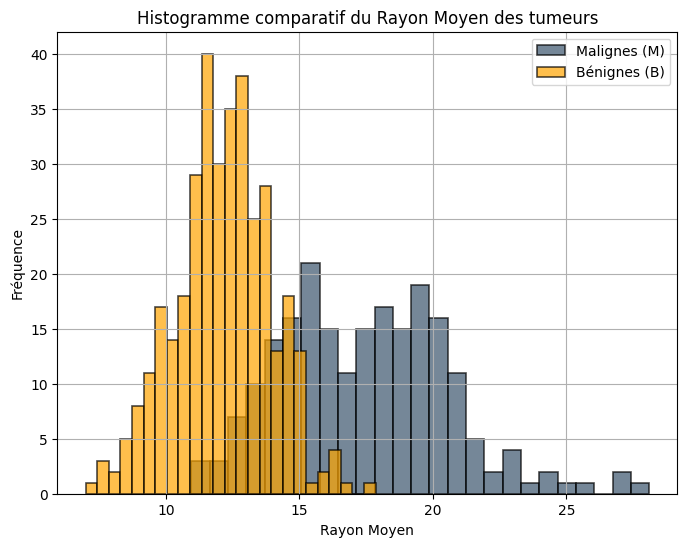

In [7]:
# Séparation des données selon le diagnostic
malignes = df[df["diagnosis"] == "M"]["radius_mean"]
benignes = df[df["diagnosis"] == "B"]["radius_mean"]

# Création du graphique
plt.figure(figsize=(8, 6))

# Histogramme des tumeurs malignes
plt.hist(
    malignes,
    bins=25,
    color=bleu,
    edgecolor="black",
    linewidth=1.2,
    alpha=0.7,
    label="Malignes (M)",
)

# Histogramme des tumeurs bénignes
plt.hist(
    benignes,
    bins=25,
    color="orange",
    edgecolor="black",
    linewidth=1.2,
    alpha=0.7,
    label="Bénignes (B)",
)

# Titres et légendes
plt.title("Histogramme comparatif du Rayon Moyen des tumeurs")
plt.xlabel("Rayon Moyen")
plt.ylabel("Fréquence")
plt.legend()
plt.grid(True)
plt.show()

**Observation :** 

>Je remarque que pour l'instant, dans deux histogrammes des tumeurs Bégnine (en or) et Maligne (en Bleu) ont tous l'air d'avoir l'allur d'une Gaussienne.
>
> De plus, une distinction ce fait autour d’un rayon de 15 : les tumeurs de rayon inférieur sont majoritairement bénignes, tandis que celles au-delà sont plus souvent malignes. Cela suggère une corrélation positive entre la taille du rayon et la probabilité qu’une tumeur soit maligne.

## Quelles variables permettent de distinguer les diagnostics ?

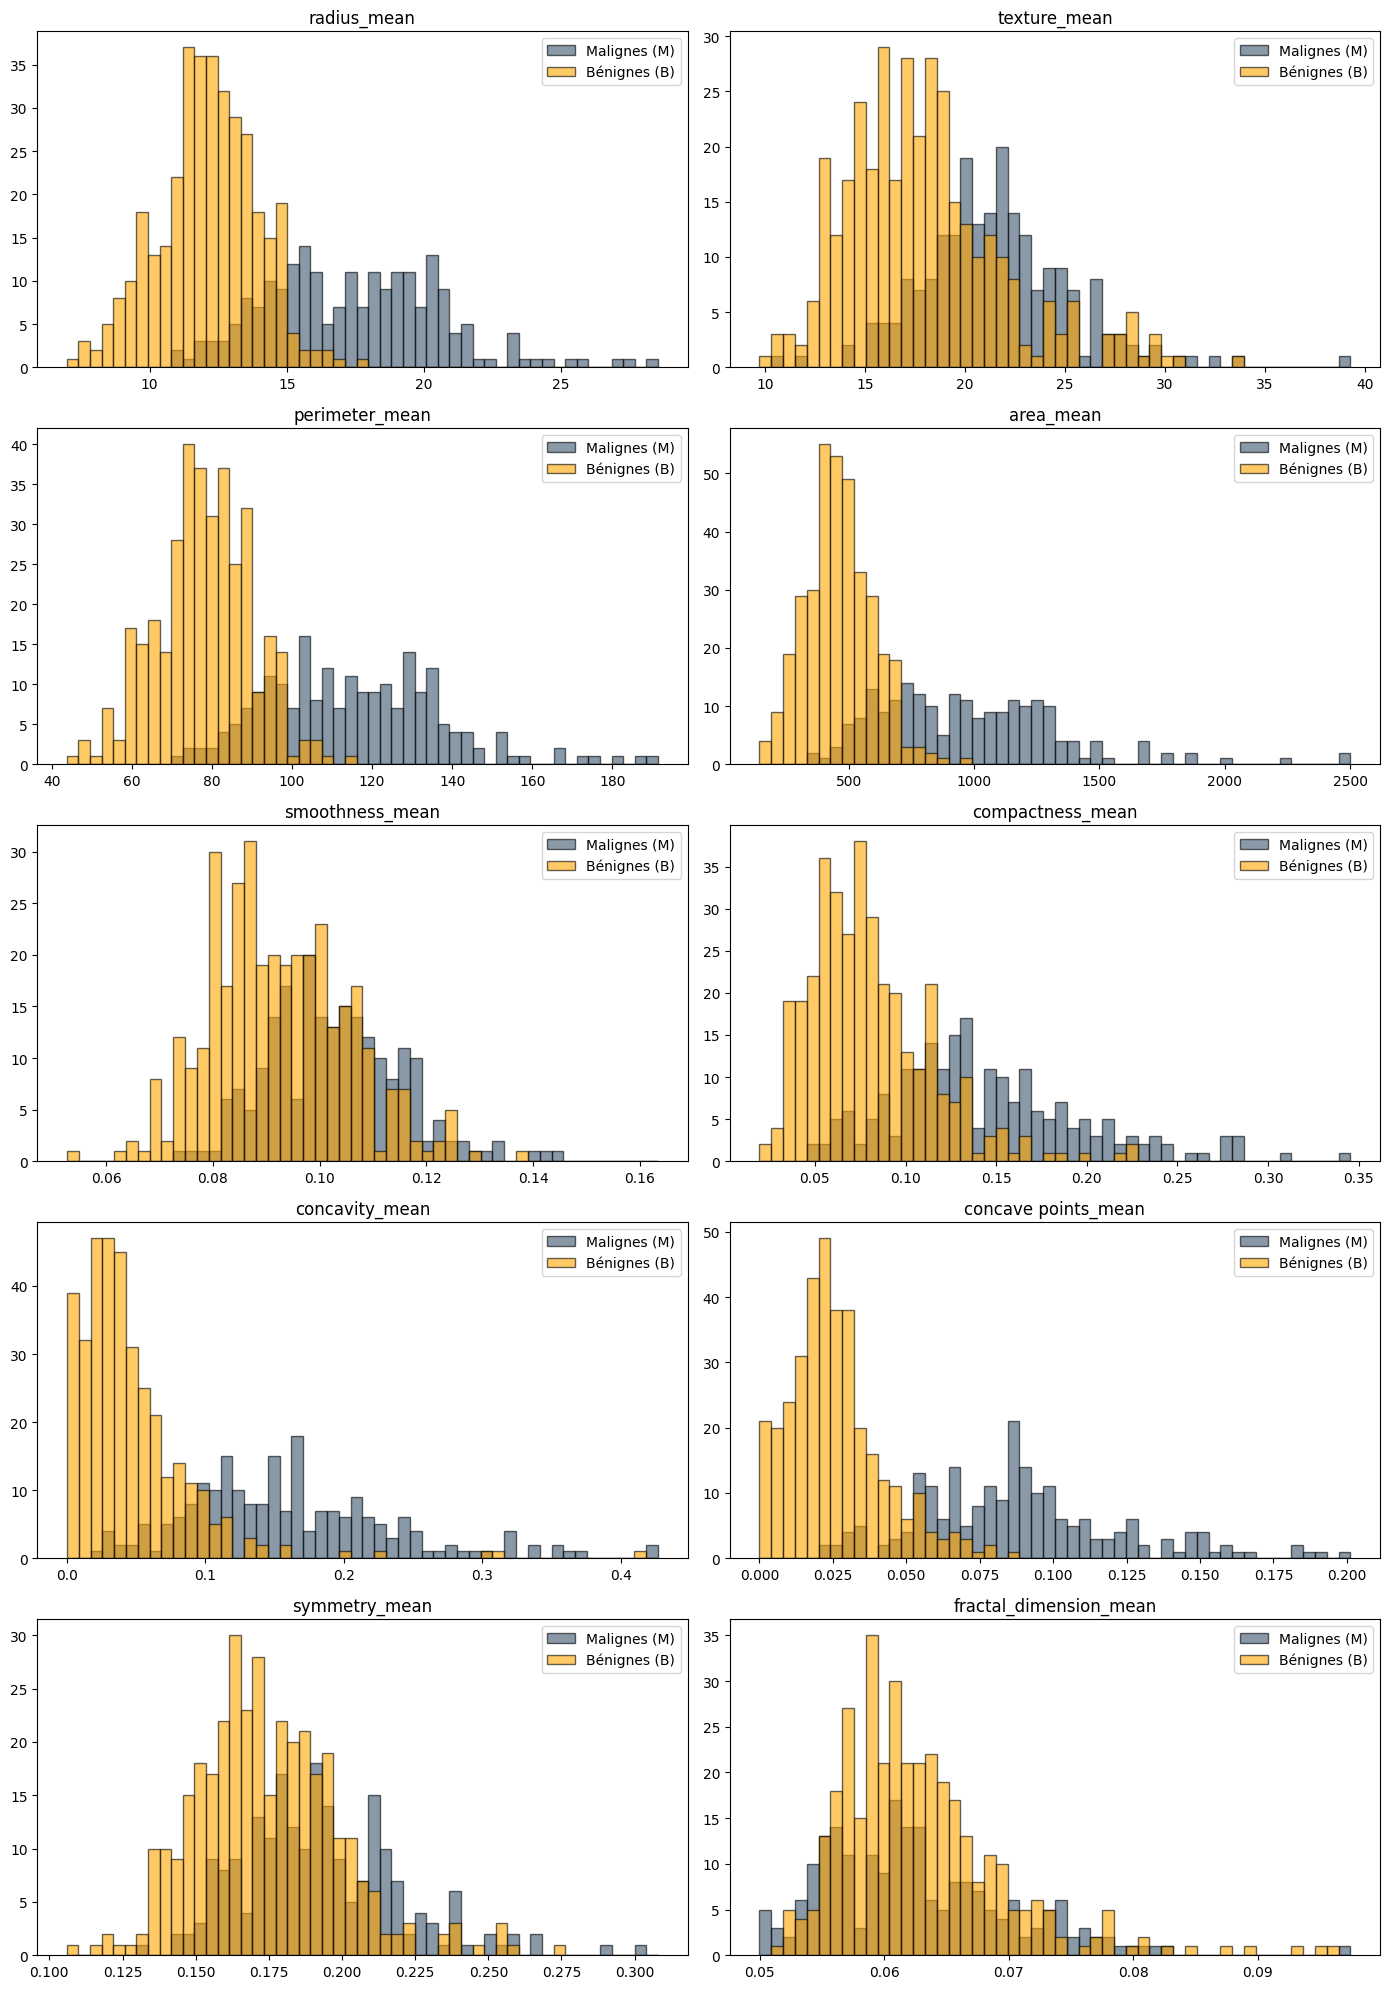

In [8]:
# Liste contenant seulement les varibles nécessaire
variable_stat = df.columns[2:12]

# Creéation du plan : 5 lignes x 2 colonnes
fig, axes = plt.subplots(5, 2, figsize=(14, 20))
axes = axes.flatten()

for i, var in enumerate(variable_stat):
    malignes = df[df["diagnosis"] == "M"][var]
    benignes = df[df["diagnosis"] == "B"][var]

    # Le bins est propre à chaque variable. Donc pour garantir un affichge 
    # de qualité et homogène. On calcul le meilleur bins pour chaque variable
    
    # Calcul du min et max global pour les deux distributions
    vmin = min(malignes.min(), benignes.min())
    vmax = max(malignes.max(), benignes.max())

    # Définir un pas de classe
    step = (vmax - vmin) / 50
    bins = np.arange(vmin, vmax + step, step)

    # Tracer les deux histogrammes
    axes[i].hist(
        malignes,
        bins=bins,
        color=bleu,
        alpha=0.6,
        label="Malignes (M)",
        edgecolor="black",
    )
    axes[i].hist(
        benignes,
        bins=bins,
        color="orange",
        alpha=0.6,
        label="Bénignes (B)",
        edgecolor="black",
    )

    axes[i].set_title(f"{var}")
    axes[i].legend()

plt.tight_layout()
plt.show()

<p style="text-align:justify;">
Pour sélectionner les variables pertinentes, je me suis concentré directement sur leur capacité à discriminer les deux types de tumeurs. L'objectif n'est pas d'analyser la forme des courbes, mais de repérer visuellement si les données permettent de trancher entre un cas bénin et un cas malin.
</p>

<p style="text-align:justify;">
En analysant les histogrammes, j'ai donc recherché les variables où les deux groupes sont le plus distincts possibles, avec un minimum de chevauchement. C'est ce critère de séparation qui guidera la performance de notre classification.
</p>

<p style="text-align:justify;">
J’ai ainsi retenu les variables suivantes, qui montrent un décalage net entre les diagnostics :
</p>

<blockquote>
- radius_mean<br>
- perimeter_mean<br>
- area_mean<br>
- compactness_mean<br>
- concavity_mean<br>
- concave points_mean
</blockquote>

<p style="text-align:justify;">
Visuellement, ces variables présentent une frontière assez claire entre les tumeurs bénignes et malignes, ce qui indique qu'elles apportent une information précieuse au modèle. À l'inverse, j'ai écarté toutes les autres variables où les distributions se superposent trop, car elles risqueraient d'apporter plus de confusion que d'aide à la décision.
</p>

## Analyse de la relation entre le Rayon et la Texture

$$\text{Texture} = f(\text{rayon})$$

**Traduction** : on veut avoir en absisse le rayon et la texture en ordonnée. Car $~  y = f(x) ~$, dans notre cas, $~ x = \text{rayon} ~$ et $~ y = \text{Texture} ~$.

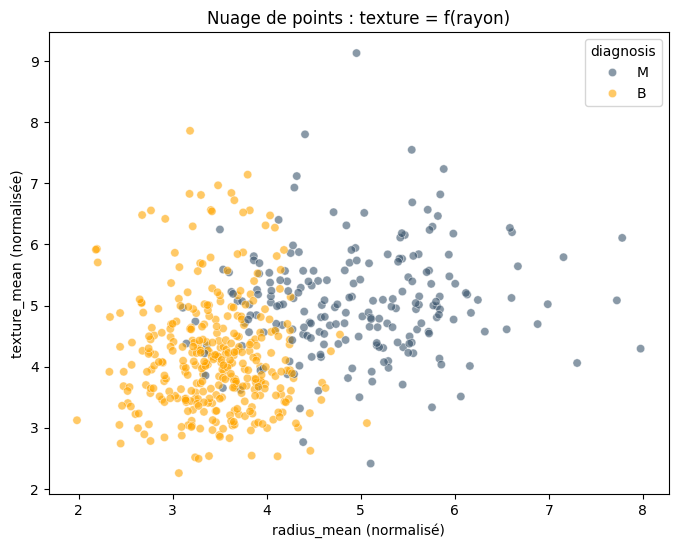

In [9]:
# --- Copie du DataFrame ---
df_plot = df.copy()

# --- Création des variables ---
df_plot["radius_norm"] = df["radius_mean"] / df["radius_mean"].std()
df_plot["texture_norm"] = df["texture_mean"] / df["texture_mean"].std()

# --- Scatterplot avec coloration par type de tumeur ---
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_plot,
    x="radius_norm",
    y="texture_norm",
    hue="diagnosis",
    palette={"M": bleu, "B": "orange"}, 
    alpha=0.6
)

# --- Titres et axes ---
plt.title("Nuage de points : texture = f(rayon)")
plt.xlabel("radius_mean (normalisé)")
plt.ylabel("texture_mean (normalisée)")
plt.show()

**Observations graphiques :**

> Au premier coup d'œil, le nuage de points ne forme pas de "clusters" isolés aux quatre coins du graphique. Les données semblent plutôt étalées de façon continue.
>
> Cependant, en décomposant l'analyse axe par axe, on remarque deux comportements très différents :
> * **Sur l'axe vertical (Texture) :** Les points bleus (B) et rouges (M) sont très mélangés. Que la texture soit faible ou élevée, on trouve des deux types de tumeurs. **Conclusion :** la texture seule ne permet pas de classer efficacement.
> * **Sur l'axe horizontal (Rayon moyen) :** C'est beaucoup plus net. On distingue une zone à gauche (valeurs faibles) majoritairement bénigne, et une zone à droite (valeurs élevées) majoritairement maligne.
>
> **Mon hypothèse :** Le rayon moyen semble être un indicateur bien plus puissant que la texture pour notre diagnostic.

Pour valider cette impression visuelle, **faisons parler les données avec les mathématiques !**

Calculons le coefficient de corrélation de Pearson pour quantifier le lien entre ces deux variables.

In [10]:
# Coéfficient de Corrélation de Pearson
corr, p_value = pearsonr(df["radius_mean"], df["texture_mean"])

print(f"Le coéfficent de corrélation de Pearson est : {round(corr,3)} Soit environ : {round(corr*100,2)} %.")

if p_value < 0.05 :
    print("\np_value inférieur à 0.05  --- Test Accépté ! ---")
else :
    print("\np_value supérieur à 0.05  --- !! Test Réfusé !! ---")         

Le coéfficent de corrélation de Pearson est : 0.324 Soit environ : 32.38 %.

p_value inférieur à 0.05  --- Test Accépté ! ---


**Analyse statistique :**

> * Le coefficient de corrélation est de **0.324** $~ \Longrightarrow ~$ Il existe une liaison positive, mais elle reste **modérée**.
> * La p-value est inférieure à **0.05** $~ \Longrightarrow ~$ Le test est significatif, on rejette l'hypothèse d'indépendance.
>
> **Interprétation :**
> Le lien statistique est réel (il n'est pas dû au hasard), mais il n'est pas très fort. Cela confirme notre observation visuelle : bien que le rayon et la texture soient légèrement liés, c'est surtout la variation du rayon qui permet de séparer les tumeurs, la texture n'apportant pas une distinction franche à elle seule.

### Validation graphique des variables discriminantes (2D & 3D)

<p style="text-align:justify;">
Avant de multiplier les graphiques, j’ai d’abord réfléchi à une stratégie de sélection pertinente. J’ai commencé par éliminer les croisements entre variables trop dépendantes. Par exemple, croiser <code>radius_mean</code> et <code>perimeter_mean</code> n'a pas d'intérêt car ces deux mesures sont géométriquement liées : elles apportent la même information.
</p>

<p style="text-align:justify;">
J’ai ensuite privilégié les croisements "hétérogènes", c’est-à-dire ceux qui associent des variables de nature différente (par exemple une variable de <b>taille</b> avec une variable de <b>forme</b>, ou une <b>moyenne</b> avec une <b>valeur extrême</b> comme les <code>_worst</code>). Mon hypothèse était que ces combinaisons auraient plus de chances de séparer visuellement les tumeurs malignes et bénignes en apportant des informations complémentaires.
</p>

<p style="text-align:justify;">
Après cette sélection théorique, je suis passé à la pratique en générant des graphiques en 2D et en 3D. J'ai analysé chaque visualisation pour voir si les groupes (M et B) se séparaient ou restaient mélangés. J'ai conservé uniquement les graphiques montrant une distinction nette. Cette étape a demandé beaucoup de rigueur pour trier efficacement l'information utile.
</p>

#### Croisements 2D testés

<p style="text-align:justify;">
J’ai croisé certaines variables deux à deux pour vérifier si leur combinaison améliorait la distinction entre les diagnostics. Voici les paires qui m'ont semblé les plus pertinentes visuellement :
</p>

- **`radius_mean` & `concave points_mean`** (Taille vs Irrégularité)\
  $\rightarrow$ L'idée était de croiser la taille du noyau avec le nombre de creux. Le résultat est convaincant : les deux types de tumeurs se séparent assez bien sur le graphique.

- **`area_mean` & `compactness_mean`** (Surface vs Densité)\
  $\rightarrow$ J’ai voulu voir si une grande surface associée à une forme compacte aidait à la différenciation. On observe que les tumeurs malignes ont tendance à regrouper les valeurs élevées sur ces deux axes simultanément.

- **`texture_mean` & `radius_worst`** (Visuel vs Valeur extrême)\
  $\rightarrow$ Ce croisement mélange une caractéristique de texture et une mesure de taille critique ("pire rayon"). Le nuage de points montre que les cas malins cumulent souvent une texture marquée et un grand rayon.

- **`area_worst` & `concave points_worst`** (Les pires cas)\
  $\rightarrow$ Ici, j’ai testé les valeurs les plus extrêmes possibles sur la taille et la forme. L'hypothèse se confirme : les cellules qui sont à la fois très grandes et très irrégulières correspondent quasi systématiquement aux cas malins.

In [11]:
# --- Normalisation des données ---
var_norm = df.iloc[:, :2].copy()

for var in df.columns[2:] :
    var_norm[var + "_norm"] = df[var] / df[var].std()

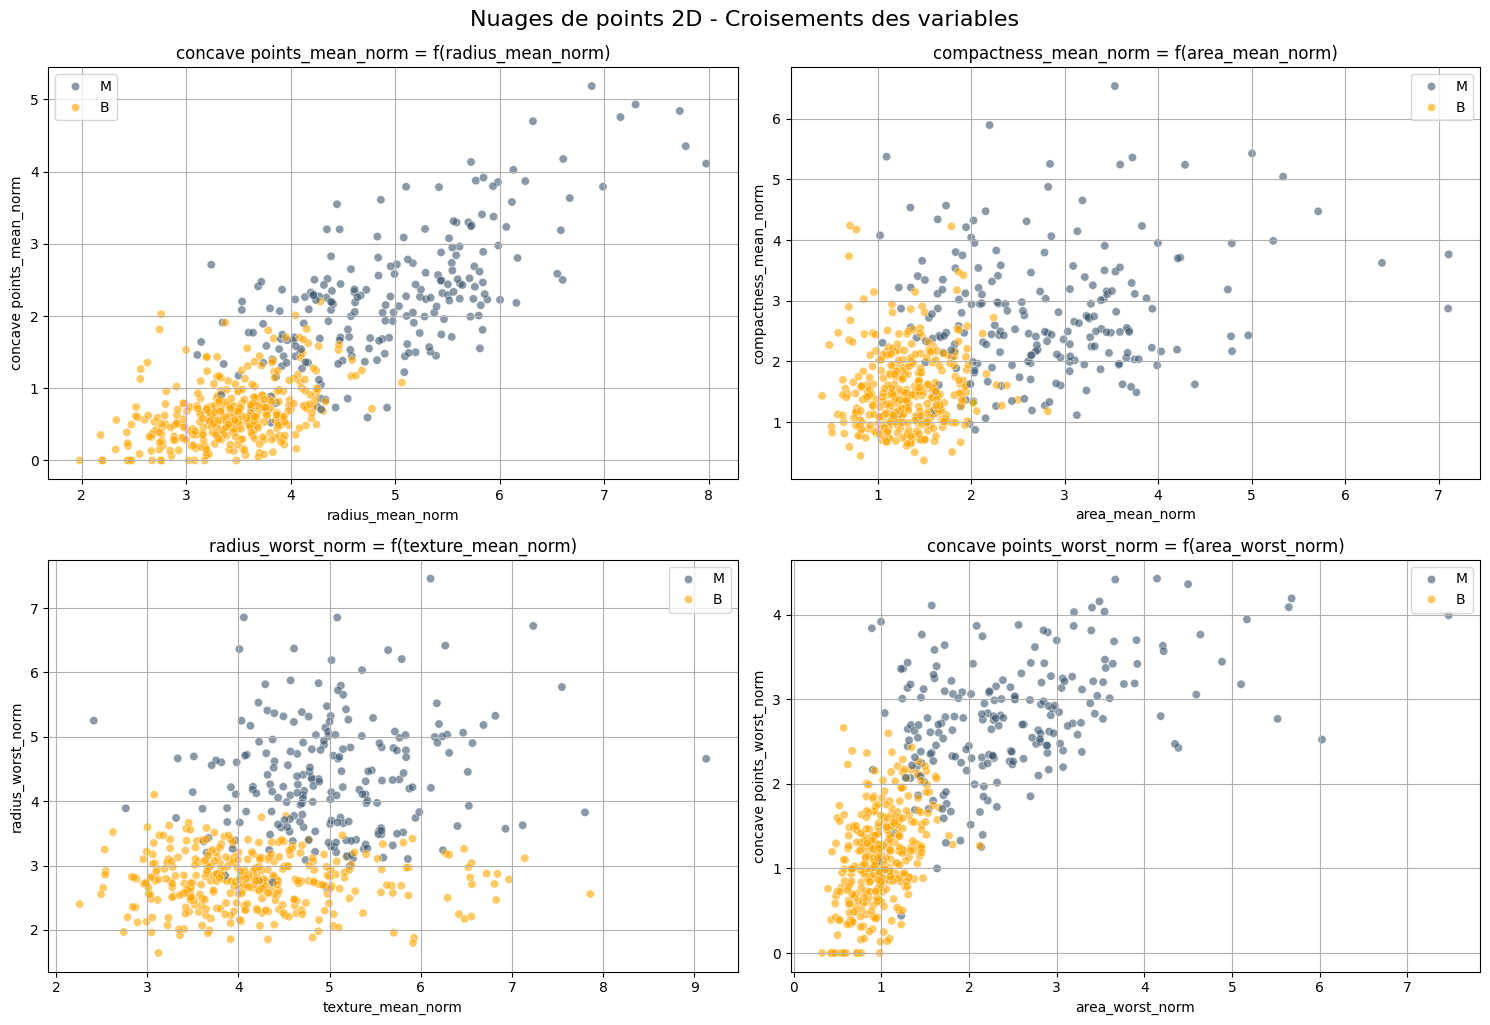

In [12]:
# --- Croisements 2D à tracer ---
plots_2d = [
    ("radius_mean_norm", "concave points_mean_norm"),
    ("area_mean_norm", "compactness_mean_norm"),
    ("texture_mean_norm", "radius_worst_norm"),
    ("area_worst_norm", "concave points_worst_norm"),
]

# --- Figure en grille : 3 colonnes, 2 lignes ---
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()

# --- Nuages de points ---
for i, (xvar, yvar) in enumerate(plots_2d):
    ax = axes[i]
    sns.scatterplot(
        data=var_norm,
        x=xvar,
        y=yvar,
        hue="diagnosis",
        palette={"M": bleu, "B": "orange"},
        alpha=0.6,
        ax=ax
    )
    ax.set_title(f"{yvar} = f({xvar})")
    ax.set_xlabel(xvar)
    ax.set_ylabel(yvar)
    ax.legend(loc="best")
    ax.grid(True)

# Cache la dernière case vide s’il y en a une
for j in range(len(plots_2d), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Nuages de points 2D - Croisements des variables", fontsize=16, y=1.02)
plt.show()

#### Bilan des croisements 2D

<p style="text-align:justify;">
Suite à l'analyse détaillée précédente, voici une synthèse des croisements de variables qui ont offert la meilleure séparation visuelle entre les tumeurs bénignes et malignes. J'ai noté l'efficacité de la distinction pour chaque paire.
</p>

| Croisement 2D | Logique du test | Résultat et Efficacité |
|:---|:---|:---|
| **`radius_mean` & `concave points_mean`** | Taille moyenne + Forme du contour | **⭐⭐ Bonne séparation**<br>Les deux groupes se distinguent clairement. |
| **`area_mean` & `compactness_mean`** | Aire + Densité ("serrée") | **⭐⭐ Les cas Malins ressortent bien**<br>Ils regroupent les valeurs élevées sur les deux axes. |
| **`texture_mean` & `radius_worst`** | Texture + Taille extrême | **⭐⭐ Intéressant**<br>Les cas Malins cumulent souvent texture forte et grand rayon. |
| **`area_worst` & `concave points_worst`** | Taille extrême + Irrégularité | **⭐⭐⭐ Excellente séparation**<br>La distinction est très nette, c'est l'un des meilleurs duos. |

---

#### Croisements de variables en 3D (visualisation interactive)

Après avoir testé des visualisations en 2D, j’ai voulu voir si passer en 3D permettrait de mieux distinguer les tumeurs bénignes et malignes.  
Je me suis donc appuyé sur certains croisements que j’avais déjà trouvés intéressants en 2D, et j’ai essayé de les combiner par trois.  
L’idée, c’était de mélanger des variables qui mesurent des choses différentes (forme, taille, texture…), en espérant que ça fasse ressortir deux groupes de points bien distincts.

Voici quelques combinaisons testées :

- **`radius_mean` / `concavity_mean` / `concave points_mean`**  
  → Ces trois variables tournent autour de la taille et de l’irrégularité du contour. Je ne savais pas si c’était trop redondant ou pas, mais en 3D, on voit que les cas malins ont tendance à avoir des valeurs hautes sur les trois axes, ce qui crée un petit regroupement.

- **`radius_mean` / `concave points_mean` / `radius_se`**  
  → Ici, j’ai voulu mélanger la taille moyenne du noyau, son irrégularité, et l’écart-type des tailles. Ça donne une idée à la fois de la forme générale et de la dispersion des tailles, ce qui m’a semblé intéressant pour repérer des tumeurs malignes plus hétérogènes.

- **`area_mean` / `concave points_worst` / `compactness_se`**  
  → Ce croisement combine la taille moyenne, un cas extrême d’irrégularité, et la variabilité de compacité. Ça m’a paru utile pour aller chercher des tumeurs aux comportements plus “atypiques”, qu’on ne verrait pas forcément avec les valeurs moyennes seules.

> **Note technique:**\
> Les graphiques en 3D interactifs utilisent la librairie **Plotly**. Pour une fluidité optimale, l'utilisation de VSCode ou d'un environnement Jupyter bien configuré est recommandée. Si la bibliothèque n'est pas installée sur votre machine :
>
> - Avec Conda : `$ conda install -c conda-forge plotly`
> - Avec Python (pip) : `$ pip install plotly`
>
> *Il est possible d'exécuter ces graphiques sur Jupyter Notebook classique, mais cela nécessite souvent l'installation d'extensions supplémentaires (widgets).*

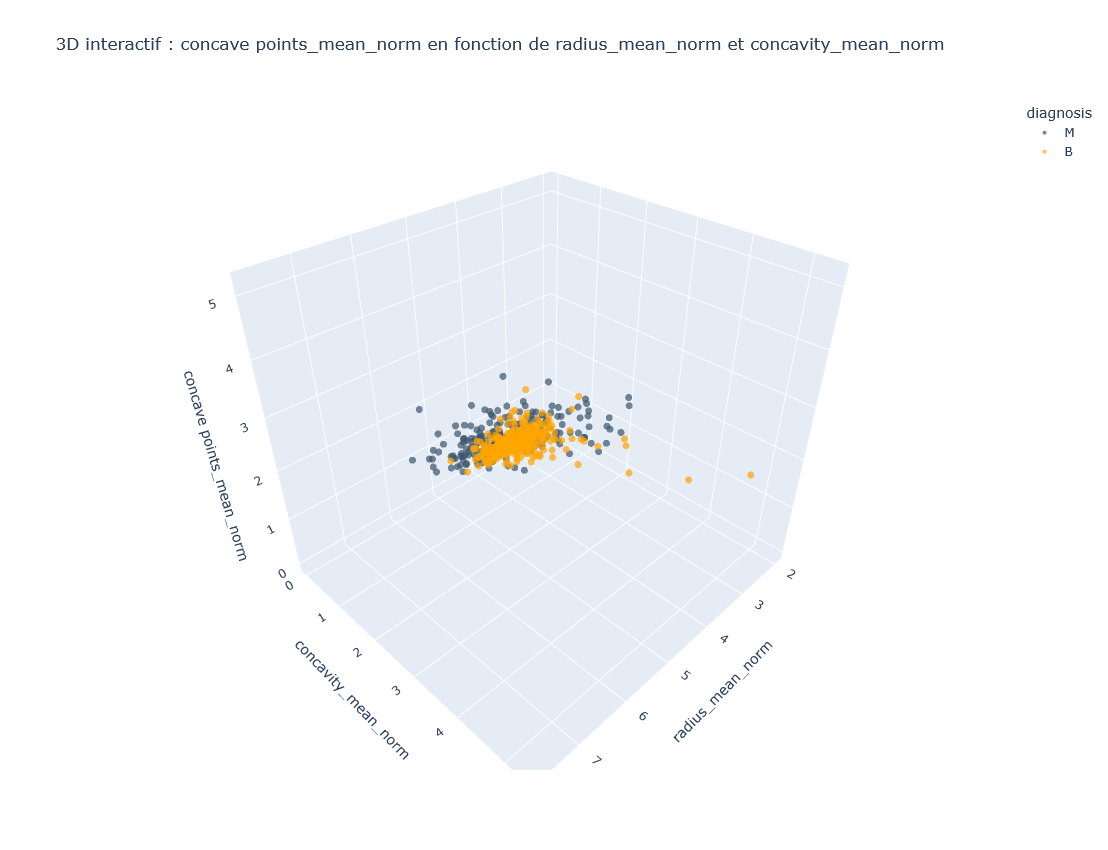

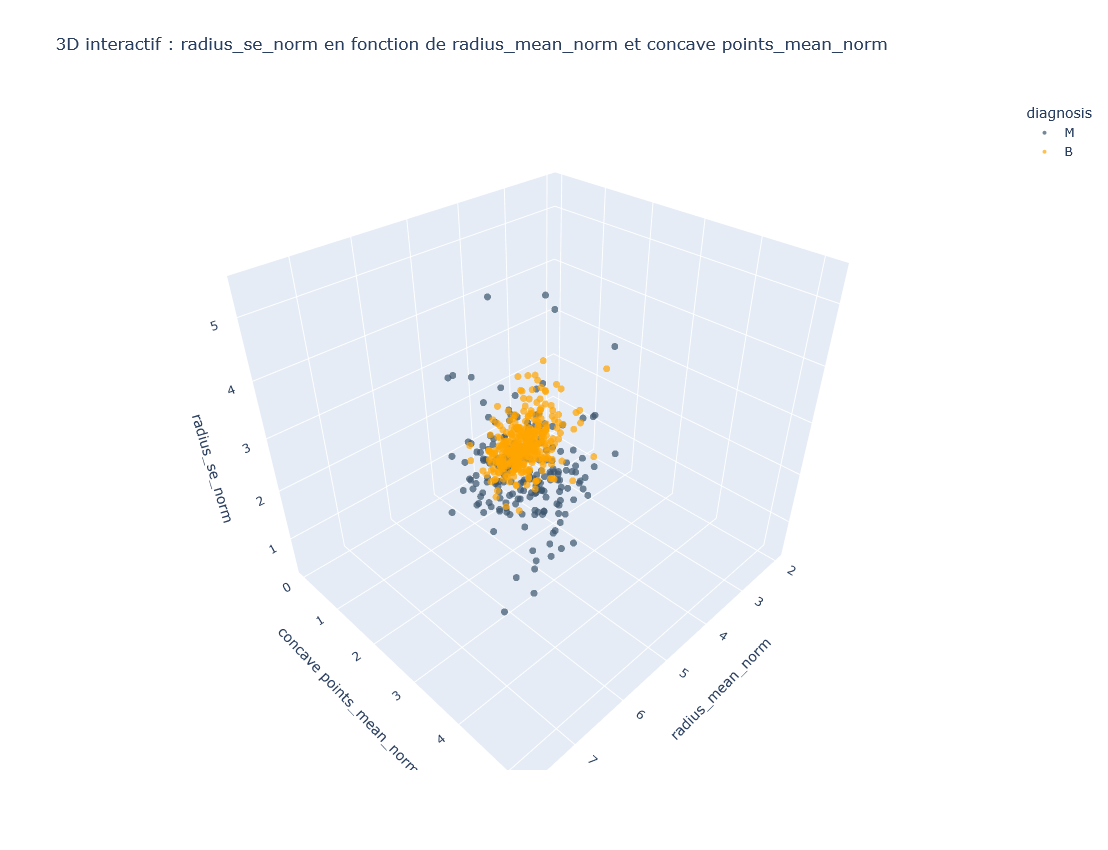

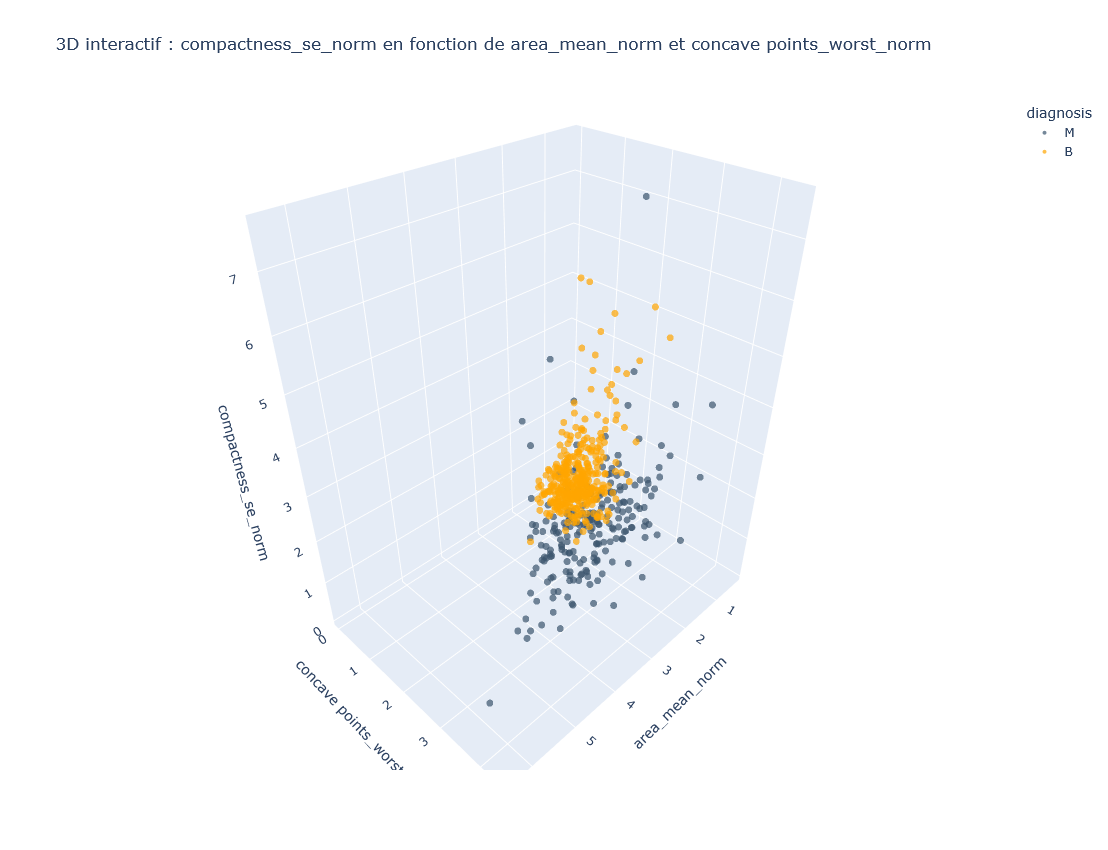

In [13]:
import plotly.express as px

# Triplets à visualiser
plots_3d = [
    ("radius_mean_norm", "concavity_mean_norm", "concave points_mean_norm"),
    ("radius_mean_norm", "concave points_mean_norm", "radius_se_norm"),
    ("area_mean_norm", "concave points_worst_norm", "compactness_se_norm")
]

# Boucle pour afficher les 4 figures interactives
for x, y, z in plots_3d:
    fig = px.scatter_3d(
        var_norm[var_norm["radius_se_norm"] < 6],    # il y avait deux points tout en haut du graphique bien séparé, nous les avons enlevé
        x=x,
        y=y,
        z=z,
        color="diagnosis",
        opacity=0.7,
        color_discrete_map={"M": bleu, "B": "orange"},
        title=f"3D interactif : {z} en fonction de {x} et {y}"
    )
    fig.update_traces(marker=dict(size=4))  # Taille des points
    fig.update_layout(
    title=f"3D interactif : {z} en fonction de {x} et {y}",
    width=1300,   # largeur en pixels
    height=850    # hauteur en pixels
)

    fig.show()

#### Bilan des croisements 3D

Voici les combinaisons retenues :

| Croisement 3D | Pourquoi ce choix ? | Observations |
|:---|:---|:---|
| **`radius_mean`<br>`concavity_mean`<br>`concave points_mean`** | Combiner la taille avec deux mesures d'irrégularité du contour. | **⭐⭐⭐ Très bon regroupement.**<br>Les tumeurs malignes se concentrent dans les valeurs hautes des trois axes, formant un amas distinct. |
| **`radius_mean`<br>`concave points_mean`<br>`radius_se`** | Ajouter l'écart-type (`se`) pour voir l'impact de la variabilité des tailles. | **⭐⭐ Bonne séparation.**<br>Cela permet de repérer les tumeurs malignes qui sont très hétérogènes (irrégulières). |
| **`area_mean`<br>`concave points_worst`<br>`compactness_se`** | Mélange de moyenne, de valeur extrême (`worst`) et de variabilité. | **⭐⭐ Utile pour les cas "hors norme".**<br>Permet de détecter des profils atypiques qu'on ne voyait pas forcément avec les moyennes seules. |

---

#### Conclusion de l'analyse graphique

Grâce à cette double approche (2D et 3D), j’ai pu identifier les variables les plus discriminantes pour notre modèle. Il ressort que les meilleures séparations s'obtiennent en combinant **la taille, la forme et l’irrégularité**.

Je retiens donc prioritairement pour la suite :
* **Les mesures de taille :** `radius_mean`, `area_mean`.
* **Les mesures de forme/irrégularité :** `concave points_mean`, `concavity_mean`.
* **Les valeurs extrêmes :** Les variables `_worst` (comme `concave points_worst`) s'avèrent redoutables pour isoler les cas malins.

Ces variables constituent donc une base solide pour l'entraînement de nos modèles de classification.

## Classification des états M ou B

### Méthode utilisée : K-Means + ACP (Analyse en Composantes Principales)

Dans cette partie, j'ai essayé une première méthode de classification automatique pour distinguer les tumeurs malignes (M) des bénignes (B). J’ai choisi d’utiliser l’algorithme **K-Means**, combiné avec une **réduction de dimension via l’ACP** pour faciliter la visualisation.

### K-Means : principe

K-Means est un algorithme de **clustering non supervisé**. Il ne connaît pas les vraies classes (ici M ou B), mais il regroupe les observations en `k` groupes (ou clusters) en minimisant une **distance intra-cluster**.

L'objectif est de minimiser la somme des distances au carré entre chaque point et le centre de son cluster :

$$
\text{Inertia} = \sum_{i=1}^{n} \| x_i - \mu_{c(i)} \|^2
$$

où :
- $ x_i $ est une observation,
- $ \mu_{c(i)} $ est le centroïde du cluster auquel appartient $ x_i $ (le centre de gravité d'après ce que nous avons compris),
- la norme $ \| \cdot \|^2 $ est la distance euclidienne au carré.

Ici, nous vons fixé **k = 2** car on veut séparer les tumeurs en deux groupes : M et B.

### ACP : pourquoi ?

Comme il y a beaucoup de variables (30 au total), nous avons d’abord appliqué une **Analyse en Composantes Principales (ACP)** pour réduire la dimension à **2 axes principaux**, tout en conservant l'information essentielle.

Cette transformation permet de projeter les données dans un plan 2D tout en gardant le plus de variance possible. Cela aide K-Means à mieux travailler et permet de visualiser les résultats.

### Évaluation : silhouette score

Pour mesurer la qualité du clustering, j’ai utilisé le **silhouette score** :

$$
s = \frac{b - a}{\max(a, b)}
$$

où :
- $ a $ est la distance moyenne entre un point et les autres points du même cluster,
- $ b $ est la distance moyenne entre ce point et les points du cluster le plus proche.

Le score varie entre -1 et 1 :
- proche de 1 → bonne séparation,
- proche de 0 → clusters proches ou superposés,
- proche de -1 → mauvais regroupement.


In [14]:
df_classified = df.copy()

# Suppression de colonne peu utile
df_classified.drop(columns=["id"], inplace=True)

# On encode la variable cible (diagnosis) en 0 / 1
df_classified["diagnosis_encoded"] = df_classified["diagnosis"].map({"B": 0, "M": 1})

# Séparation entre les variables explicatives (X) et la cible (y)
X = df_classified.drop(columns=["diagnosis"], axis=1, inplace=True)
y = df_classified["diagnosis_encoded"]

df_classified

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_encoded
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

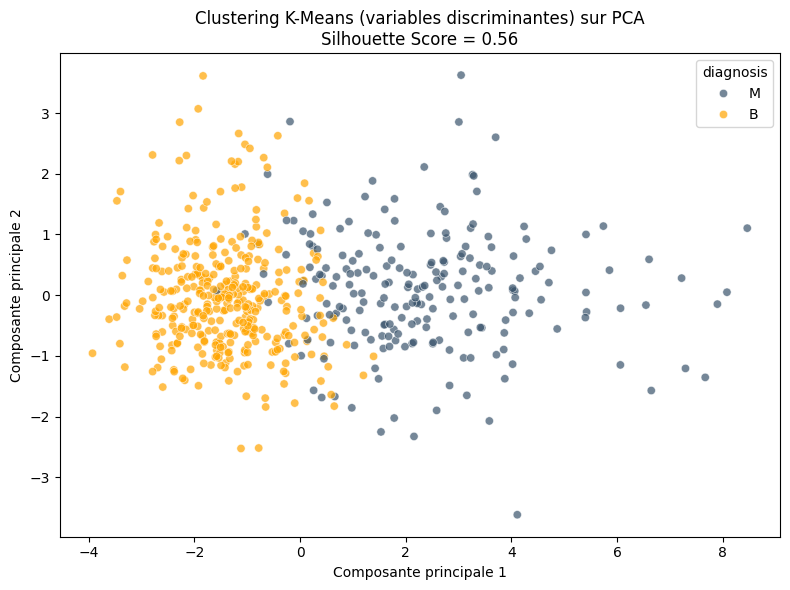

In [16]:
# On sélectionne les variables discriminantes
vars_discrim = [
    "radius_mean", "area_mean", "concave points_mean", "perimeter_mean",
    "compactness_mean", "texture_mean", "concave points_worst"
]

# Normalisation
scaler = StandardScaler()
X_selected = df_classified[vars_discrim]
X_scaled = scaler.fit_transform(X_selected)

# Réduction de dimension avec ACP (2 composantes)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Clustering avec KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Silhouette score
sil_score = silhouette_score(X_pca, clusters)

# Affichage
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1],
    hue=df["diagnosis"],
    palette={"M": bleu, "B": "orange"},
    ax=ax, alpha=0.7
)
plt.title(f"Clustering K-Means (variables discriminantes) sur PCA\nSilhouette Score = {sil_score:.2f}")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.tight_layout()
plt.show()


### 2.7.5 Résultats et interprétation

Après l’application du K-Means sur les deux premières composantes principales, on observe deux regroupements plutôt bien séparés. Le **silhouette score est de 0.56**, ce qui est **modérément satisfaisant** : la séparation n’est pas parfaite, mais il y a **quand même une structure identifiable** dans les données.

Visuellement, on voit que les tumeurs malignes (M) et bénignes (B) ne se mélangent pas trop, ce qui confirme que les variables choisies contiennent **de l’information discriminante**. 

Cela montre que, même sans supervision (sans connaître les classes), **une méthode simple comme K-Means combinée à une réduction de dimension** peut déjà capturer une séparation non aléatoire.

## Mise en évidence de liaisons entre les variables

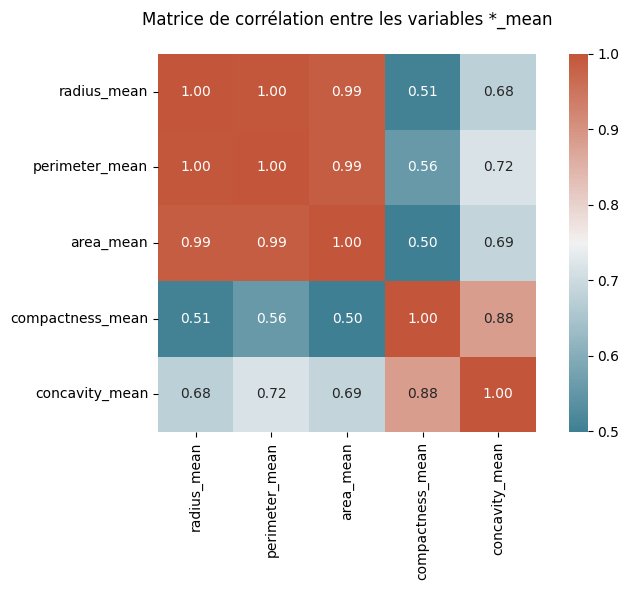

In [17]:
selected_vars = [
    "radius_mean",
    "perimeter_mean",
    "area_mean",
    "compactness_mean",
    "concavity_mean"
]

corr_matrix = df[selected_vars].corr(method="pearson")

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True), fmt=".2f", square=True)
plt.title("Matrice de corrélation entre les variables *_mean\n")
plt.tight_layout()
plt.show()

### Analyse de la matrice de corrélation (variables `mean`)

Cette matrice présente les coefficients de corrélation de Pearson entre les variables moyennes (`mean`).\
L'objectif est de repérer les informations redondantes pour simplifier nos futurs modèles.

#### Corrélations quasi-totales : le facteur "Taille"

- `radius_mean` ~ `perimeter_mean` : **1.00**
- `radius_mean` ~ `area_mean`      : **0.99**
- `area_mean` ~ `perimeter_mean`   : **0.99**

**Analyse :** C'est un résultat géométriquement logique (le périmètre et l'aire dépendent directement du rayon). Ces trois variables mesurent fondamentalement la même chose : la **taille** de la tumeur.
**Décision :** Elles sont redondantes. Les conserver toutes les trois dans un modèle créerait de la multicolinéarité (bruit statistique). Il faudra en choisir une seule (par exemple le `radius`) pour représenter la taille.

#### Corrélations fortes : les indicateurs de "Forme"

- `compactness_mean` ~ `concavity_mean` : **0.88**

**Analyse :** Ces deux variables décrivent la régularité du contour. Une tumeur qui présente beaucoup de creux (`concavity`) est mécaniquement moins compacte.
**Décision :** Là encore, le risque de redondance est élevé. Il faudra être vigilant si on les utilise ensemble.

#### Corrélations intermédiaires : Lien Taille / Forme

 - `radius_mean` ~ `concavity_mean`   : **0.68**
- `perimeter_mean` ~ `concavity_mean` : **0.72**
- `area_mean` ~ `concavity_mean`      : **0.69**
- `radius_mean` ~ `compactness_mean`  : **0.51**

**Analyse :** On observe une corrélation positive significative. Cela suggère biologiquement que **plus une tumeur est grosse, plus son contour a tendance à être irrégulier** et accidenté. C'est une information précieuse pour le diagnostic.

### Bilan et Stratégie

L'analyse de cette matrice me permet de définir ma stratégie de sélection de variables :

1.  **Éviter la redondance :** Je ne garderai qu'une seule variable de taille (probablement `radius_mean` ou `area_mean`) pour éviter de biaiser le modèle.
2.  **Privilégier la complémentarité :** Pour construire un modèle performant, il sera plus pertinent de croiser une variable de **taille** avec une variable de **forme** (comme `concave points` ou `texture`), plutôt que d'empiler des variables qui disent la même chose.

### Modélisation des relations : Ajustement linéaire

In [18]:
def regression_lineaire_personnalisee(x, y):
    """Renvoie les coefficients a et b de la droite y = ax + b, et le R²"""
    x = np.array(x).flatten()
    y = np.array(y).flatten()
    
    x_mean = x.mean()
    y_mean = y.mean()

    # Coefficients de régression : a (pente) et b (ordonnée à l'origine)
    cov = np.sum((x - x_mean) * (y - y_mean))
    var_x = np.sum((x - x_mean)**2)
    best_a = cov / var_x
    b = y_mean - best_a * x_mean

    # Prédiction et R²
    y_pred = best_a * x + b
    SCT = np.sum((y - y_mean)**2)
    SCR = np.sum((y - y_pred)**2)
    R_carre = 1 - (SCR / SCT)

    return best_a, b, R_carre, y_pred

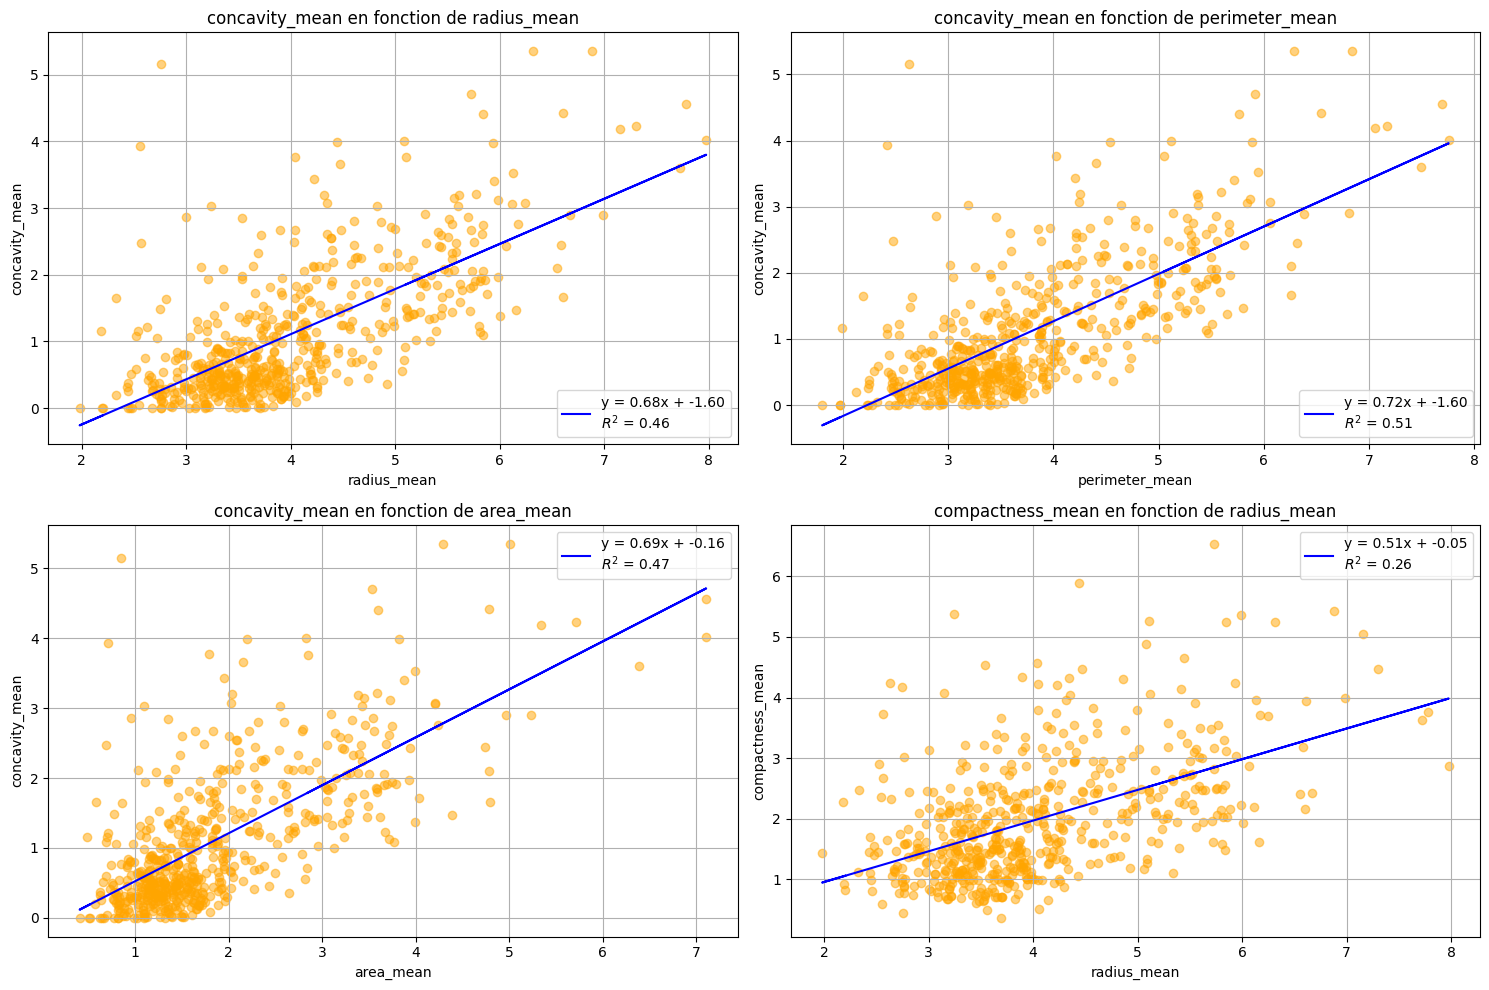

In [19]:
# --- Tuples de variables ---
selected_pairs_corrected = [
    ("radius_mean", "concavity_mean"),
    ("perimeter_mean", "concavity_mean"),
    ("area_mean", "concavity_mean"),
    ("radius_mean", "compactness_mean")
]

# --- Figure en grille : 3 colonnes, 2 lignes ---
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()

for i, (x_var, y_var) in enumerate(selected_pairs_corrected):
    ax = axes[i]
    x = var_norm[[x_var + "_norm"]].values
    y = var_norm[y_var + "_norm"].values

    # --- Régréssion ---
    a, b, r_squared, y_pred = regression_lineaire_personnalisee(x, y)

    # --- Nuages de Points ---
    ax.scatter(x, y, alpha=0.5, color="orange")
    ax.plot(x, y_pred, color='blue', label=f"y = {a:.2f}x + {b:.2f}\n$R^2$ = {r_squared:.2f}")
    ax.set_xlabel(x_var)
    ax.set_ylabel(y_var)
    ax.set_title(f"{y_var} en fonction de {x_var}")
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

<p style="text-align:justify;">
Suite à l'analyse de la matrice de corrélation, j'ai voulu quantifier la nature des liens entre les variables de taille et de forme. J'ai pour cela réalisé des régressions linéaires simples (méthode des moindres carrés) pour voir si une variable permettait d'en "prédire" une autre.
</p>

#### Synthèse des résultats (Taille vs Forme)

Ce tableau résume la qualité des modèles linéaires testés (coefficient $R^2$) :

| Variable X (Explicative) | Variable Y (Cible) | Score $R^2$ | Analyse du lien |
|:---|:---|:---|:---|
| `radius_mean` | `concavity_mean` | **0.46** | **Lien modéré.**<br>Plus le rayon augmente, plus la concavité a tendance à augmenter, mais la dispersion reste importante. |
| `perimeter_mean` | `concavity_mean` | **0.51** | **Le meilleur ajustement.**<br>Le périmètre semble être la grandeur géométrique la plus liée à la concavité des contours. |
| `area_mean` | `concavity_mean` | **0.47** | **Similaire au rayon.**<br>Les tumeurs étendues sont souvent plus concaves. |
| `radius_mean` | `compactness_mean` | **0.26** | **Lien faible.**<br>La taille du noyau n'explique pas vraiment sa compacité. Les deux informations sont assez indépendantes. |

> **Rappel théorique :** Le coefficient de détermination ($R^2$) mesure la proportion de variance de Y expliquée par X. Plus il est proche de 1, plus la régression est pertinente.

#### Interprétation des résultats

Ces modélisations mettent en lumière deux points essentiels pour la suite de l'étude :

1.  **Lien Structurel :** Il existe une connexion physique entre la taille et l'irrégularité. Les grosses tumeurs ont tendance à être plus "accidentées" (concaves). Cependant, ce n'est pas une règle absolue ($R^2$ autour de 0.5), ce qui signifie que la taille ne suffit pas à tout expliquer : **la forme apporte une information complémentaire.**
2.  **Confirmation de la Redondance :** On remarque que le lien `area_mean` → `concavity` ($R^2 = 0.47$) est quasi identique au lien `radius_mean` → `concavity` ($R^2 = 0.46$).
    > Cela confirme mathématiquement ce que nous avions vu : **le Rayon et l'Aire portent la même information.** Inutile de garder les deux pour prédire la forme.

### Introduction à la régression linéaire multiple

Dans cette section, nous étudions une **relation linéaire multiple** entre plusieurs variables statistiques issues du jeu de données médical. L’objectif est de modéliser la variable `concavity_mean` (mesure de la courbure dans les contours des tumeurs) en fonction de deux autres variables : `radius_mean` (taille moyenne du noyau) et `compactness_mean` (lissage ou densité du contour).

La régression linéaire multiple cherche à ajuster un **plan** dans un espace 3D, à partir d’un modèle de la forme :

$$
\text{concavity\_mean} = \beta_1 \cdot \text{radius\_mean} + \beta_2 \cdot \text{compactness\_mean} + \epsilon
$$

où :
- $\beta_1$ et $\beta_2$ sont les coefficients associés à chaque variable explicative,
- $\epsilon$ est l’erreur aléatoire.

Un **prétraitement par normalisation** a été appliqué sur les variables afin de rendre les échelles comparables. Un graphique interactif en 3D permet ensuite de visualiser à la fois les données et le plan ajusté.

**GRAPHIQUE 3D INTÉRACTIF $\Longrightarrow$ librairie PLOTLY $\wedge$ (VSCode $\vee$ Notebook) !**

Modèle de régression linéaire multiple :
concavity_mean = 0.3089 * radius_mean + 0.7268 * compactness_mean + -1.5604
R² : 0.851


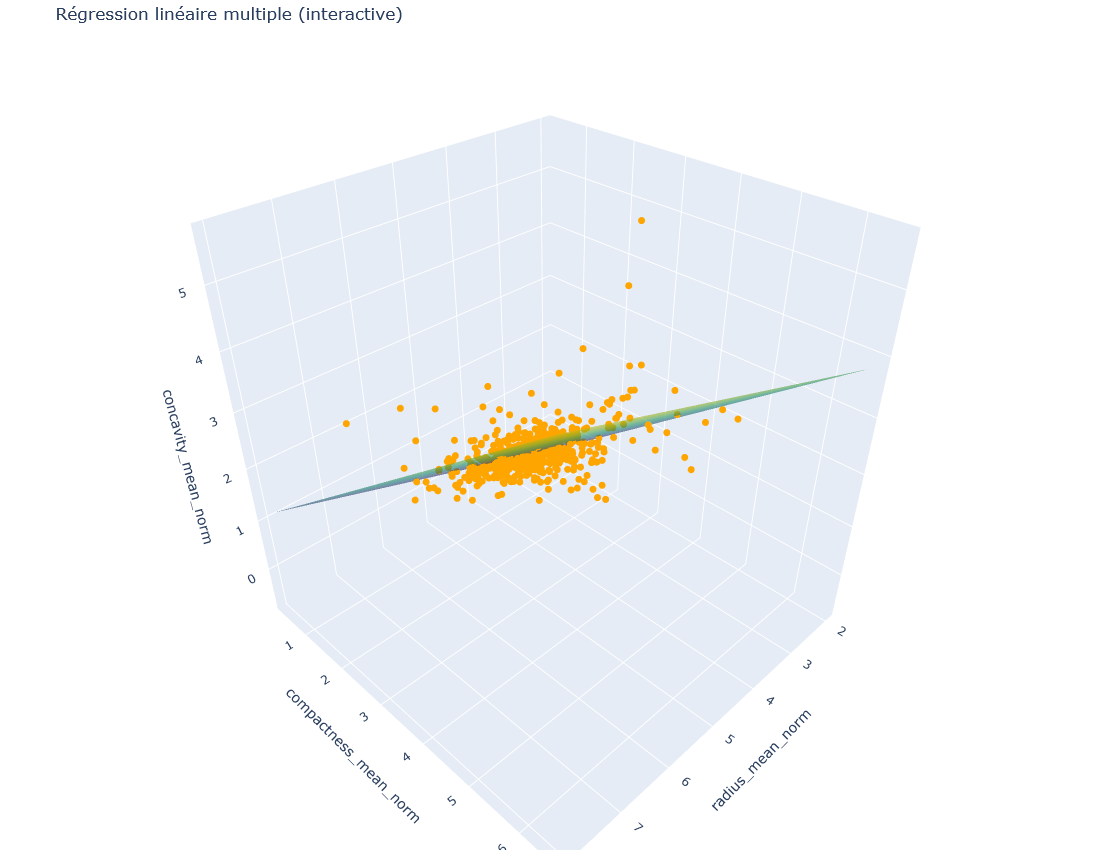

In [20]:
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Données
X = var_norm[["radius_mean_norm", "compactness_mean_norm"]]
y = var_norm["concavity_mean_norm"]

# Modèle de régression linéaire
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

# Coefficients
coef_radius = model.coef_[0]
coef_compactness = model.coef_[1]
intercept = model.intercept_

print("Modèle de régression linéaire multiple :")
print(f"concavity_mean = {coef_radius:.4f} * radius_mean + {coef_compactness:.4f} * compactness_mean + {intercept:.4f}")
print(f"R² : {r2:.3f}")

# Création de la grille pour le plan
x_range = np.linspace(X["radius_mean_norm"].min(), X["radius_mean_norm"].max(), 50)
y_range = np.linspace(X["compactness_mean_norm"].min(), X["compactness_mean_norm"].max(), 50)
x_grid, y_grid = np.meshgrid(x_range, y_range)
z_grid = model.intercept_ + coef_radius * x_grid + coef_compactness * y_grid

# Création du graphique Plotly
fig = go.Figure()

# Nuage de points 3D
fig.add_trace(go.Scatter3d(
    x=X["radius_mean_norm"],
    y=X["compactness_mean_norm"],
    z=y,
    mode='markers',
    marker=dict(size=4, color='orange'),
    name="Données réelles"
))

# Plan de régression
fig.add_trace(go.Surface(
    x=x_grid,
    y=y_grid,
    z=z_grid,
    colorscale='Viridis',
    opacity=0.6,
    showscale=False,
    name="Plan de régression"
))

# Mise en forme
fig.update_layout(
    title="Régression linéaire multiple (interactive)",
    scene=dict(
        xaxis_title="radius_mean_norm",
        yaxis_title="compactness_mean_norm",
        zaxis_title="concavity_mean_norm"
    ),
    margin=dict(l=0, r=0, b=0, t=40),
    width=1300,   # largeur en pixels
    height=850    # hauteur en pixels
)

fig.show()

### Observations et conclusion

Le modèle obtenu est le suivant :

$$
\text{concavity\_mean} = 0.3089 \cdot \text{radius\_mean} + 0.7268 \cdot \text{compactness\_mean} - 1.5604
$$

avec un coefficient de détermination $R^2 = 0.851$. Ce score est très élevé, ce qui signifie que **plus de 85 % de la variabilité de `concavity_mean`** est expliquée par la combinaison linéaire de `radius_mean` et `compactness_mean`.

Cela montre que ces deux variables (**l'une liée à la taille**, l'autre **à la forme du contour**) sont fortement informatives pour prédire la concavité moyenne d'une tumeur. De plus, le modèle est cohérent visuellement (plan bien ajusté) et numériquement (forte explicabilité).

Enfin, ce bon résultat valide le choix de ces trois variables comme **bon triplet complémentaire** : elles agissent sur des dimensions différentes de la tumeur et permettent, ensemble, une modélisation efficace et interprétable. Ce type d’analyse est particulièrement pertinent dans un contexte de classification ou de diagnostic médical.


## Prédiction avec régréssion logistique

### Méthodologie : Préparation à la Classification (Machine Learning)

#### Séparation des données : Train vs Test

Avant d'entraîner le moindre modèle (Régression Logistique, KNN, etc.), une étape est cruciale pour garantir la validité scientifique de nos résultats : la séparation des données.

L’objectif est de simuler le comportement du modèle face à la réalité. On ne peut pas tester la qualité d'un modèle sur les données qu'il a déjà "vues" et apprises, ce serait de la triche. C'est pourquoi j'utilise la fonction `train_test_split`.

<div style="display: flex; align-items: flex-start; gap: 20px;">

  <div style="flex: 0 0 35%;">
    <img src="./logo/train-test-split1.png" alt="train_test_split" style="width: 100%; border: 1px solid #ddd; padding: 5px; border-radius: 5px;">
    <p style="text-align: center; font-size: 0.8em; color: #666; margin-top: 5px;">Source : datascientest.com</p>
  </div>

  <div style="flex: 1;">
    <p style="text-align:justify; margin-top:0;">
      <strong>Pourquoi couper les données ?</strong><br>
      Au début, je me demandais comment savoir si mon modèle était vraiment performant. J'ai découvert qu'en Machine Learning, la règle d'or est de diviser le dataset en deux :
    </p>
    <ul>
      <li><strong>Train Set (Jeu d'entraînement) :</strong> C'est le manuel scolaire avec lequel le modèle apprend.</li>
      <li><strong>Test Set (Jeu de test) :</strong> C'est l'examen final. Le modèle n'a jamais vu ces données.</li>
    </ul>
    <p style="text-align:justify;">
      Grâce à la fonction <code>train_test_split</code>, je divise mes matrices <strong>X</strong> (variables) et <strong>y</strong> (cible) de façon aléatoire. Cela me permet de vérifier la capacité de <strong>généralisation</strong> de mon modèle et d'éviter deux pièges classiques que j'ai découverts :
    <br>
    </p>
    <p><strong>Le Sur-apprentissage (Overfitting)</strong></p>
    <p style="text-align:justify;">
      C’est quand le modèle apprend <em>trop bien</em>, un peu comme un étudiant qui apprendrait les exercices par cœur sans comprendre la logique.
      <br><strong>Le symptôme :</strong> Il a 20/20 à l'entraînement, mais il échoue lamentablement sur le Test Set car il a appris le "bruit" des données au lieu de la vraie tendance.
    </p>
    <p><strong>Le Sous-apprentissage (Underfitting)</strong></p>
    <p style="text-align:justify;">
      À l’inverse, c'est quand le modèle est trop simpliste pour capturer la complexité du problème.
      <br><strong>Le symptôme :</strong> Les résultats sont mauvais partout (entraînement et test). Le modèle n'a rien compris à la structure des données.
    </p>
    <hr style="border: 0; border-top: 1px solid #eee; margin: 15px 0;">
    <p style="background-color: #f9f9f9; padding: 10px; border-left: 5px solid #2196F3; font-style: italic;">
      <strong>Mon objectif :</strong> Trouver le juste milieu. Je veux un modèle qui ne se contente pas de réciter ce qu'il a vu (Overfitting), mais qui a compris la logique globale pour prédire correctement le diagnostic de nouveaux patients.
    </p>

  </div>
</div>

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Recherche systématique des meilleures combinaisons (Automating Feature Selection)

#### Méthodologie : l'approche par "Force Brute" intelligente

Pour ne pas me limiter à ma seule intuition visuelle, j'ai décidé d'utiliser la puissance de calcul pour tester objectivement quelles variables fonctionnent le mieux ensemble.

Mon objectif est de générer toutes les combinaisons possibles de variables parmi ma sélection, puis de les évaluer avec un modèle de régression logistique. Cependant, tester des combinaisons au hasard n'aurait pas de sens. J'ai donc appliqué des **règles de filtrage** pour ne garder que des duos ou trios pertinents :

1.  **Exclusion des variables redondantes** :\
    Je ne combine pas des variables qui disent la même chose géométriquement (ex : `radius_mean` avec `perimeter_mean`).
2.  **Exclusion des variantes d'une même mesure** :\
    Pour favoriser la diversité de l'information, j'évite de mettre la moyenne et la valeur "pire" d'une même caractéristique ensemble (ex : pas de `radius_mean` avec `radius_worst` dans le même groupe).

Concrètement, j'ai lancé un algorithme qui teste toutes les combinaisons possibles de **2, 3 et 4 variables** ($n \in [2,4]$) respectant ces critères.

#### Classification par 2-uplets

**Méthodologie de sélection**

J'ai appliqué une régression logistique sur l'ensemble des paires de variables générées précédemment. Pour ne retenir que les modèles performants, j'ai filtré les résultats avec un seuil de **précision > 85%** et j'ai analysé le **TOP 10**.

In [22]:
import itertools

base_vars = ["radius", "area", "compactness", "concavity", "concave points", "texture", "fractal_dimension"]
types = ["mean", "se", "worst"]

# Construction de toutes les combinaisons : base + type
full_vars = [f"{var}_{t}" for var in base_vars for t in types]

# Génération des couples et triplets possibles
couples = list(itertools.combinations(full_vars, 2))
triplets = list(itertools.combinations(full_vars, 3))
uplets_4 = list(itertools.combinations(full_vars, 4))

print(f"À partir des 5 grandeurs, nous avons : {len(full_vars)} variables.")
print(f"Nombre de Combinaisons par paires (couples) : {len(couples)} variables.")
print(f"Nombre de Combinaisons par triplets : {len(triplets)} variables.")
print(f"Nombre de Combinaisons par 4-uplets : {len(uplets_4)} variables.")

À partir des 5 grandeurs, nous avons : 21 variables.
Nombre de Combinaisons par paires (couples) : 210 variables.
Nombre de Combinaisons par triplets : 1330 variables.
Nombre de Combinaisons par 4-uplets : 5985 variables.


In [23]:
resultats  = []

# Bases discriminantes identifiées plus tôt
discriminant_bases = {
    "radius", 
    "area", 
    "compactness", 
    "texture",
    "concavity",
    "concave points",
    "fractal_dimension"
}

for couple in couples:
    base_x = couple[0].split('_')[0]
    base_y = couple[1].split('_')[0]

    # Garder uniquement si les deux bases sont discriminantes
    if base_x not in discriminant_bases or base_y not in discriminant_bases:
        continue

    # Éviter les comparaisons avec la même base (ex: radius_mean vs radius_se)
    if base_x == base_y:
        continue

    # --- Données ---
    X = df[[couple[0], couple[1]]]
    y = df["diagnosis"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # --- Modèle ---
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # --- Résultats ---
    acc = accuracy_score(y_test, y_pred)

    if acc > 0.85:
        resultats.append([couple[0], couple[1], round(acc * 100, 2)])

vec_result = pd.DataFrame(resultats, columns=["Var_1", "Var_2", "Accuracy"]).sort_values(by="Accuracy", ascending=False).head(10)
vec_result

,Var_1,Var_2,Accuracy
69,area_worst,texture_worst,95.61
31,radius_worst,texture_mean,95.61
27,radius_worst,concavity_worst,94.74
68,area_worst,texture_se,94.74
60,area_worst,compactness_worst,94.74
67,area_worst,texture_mean,94.74
2,radius_mean,area_worst,94.74
33,radius_worst,texture_worst,94.74
24,radius_worst,compactness_worst,93.86
32,radius_worst,texture_se,93.86


**Choix final des couples de variables**

Parmi les meilleures combinaisons, j’ai décidé de retenir les deux suivantes :

1.  **`radius_worst` & `texture_mean`** (Précision : **95.61 %**)
2.  **`area_worst` & `compactness_worst`** (Précision : **94.74 %**)

**Pourquoi ce choix ?**
Ces paires associent des variables de nature différente (Taille vs Texture pour la première, Taille vs Forme pour la seconde). Cette complémentarité permet au modèle de tracer une frontière de décision plus robuste.

> **Note sur la redondance :**
> J'ai écarté certaines paires qui avaient pourtant d'excellents scores (comme `area_worst` & `texture_worst`).
>
> **Raison :** `area` (aire) et `radius` (rayon) sont géométriquement liées et donc très corrélées. Utiliser deux modèles basés sur la même information de "taille" n'apporte pas de diversité. J'ai préféré conserver le second couple (`area` + `compactness`) car il introduit une information de **forme**, ce qui enrichit notre analyse.

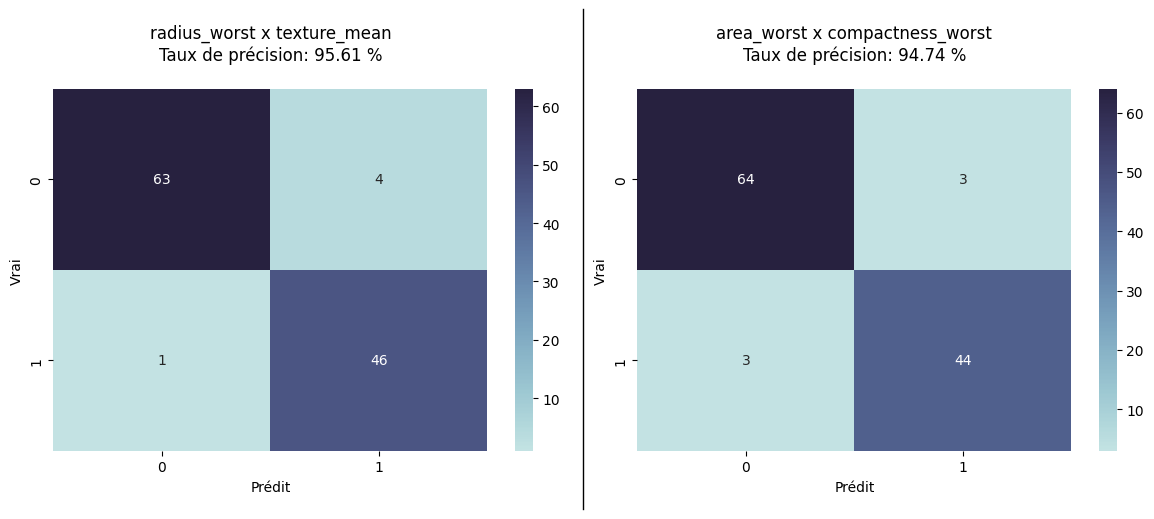

In [24]:
# Variables sélectionnées
selected_pairs = [
    ("radius_worst", "texture_mean"),
    ("area_worst", "compactness_worst")
]

# --- Figure : 1 ligne x 2 colonnes ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, (x_var, y_var) in enumerate(selected_pairs):
    # --- Données ---
    X = df[[x_var, y_var]]
    y = df["diagnosis"]

    # --- Séparation train/test ---
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # --- Modèle ---
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # --- Matrice de confusion ---
    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)

    # --- Affichage ---
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap=sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True),
        ax=axes[i]
    )
    axes[i].set_title(f"{x_var} x {y_var}\nTaux de précision: {round(acc * 100, 2)} %\n")
    axes[i].set_xlabel("Prédit")
    axes[i].set_ylabel("Vrai")


# --- Ajout de lignes de séparation entre les sous-graphes ---
fig_width, fig_height = fig.get_size_inches()
fig.add_artist(plt.Line2D([0.490, 0.490], [0, 1], color="black", linewidth=1))

plt.tight_layout()
plt.show()

**Analyse des performances (Confusion Matrix)**

Le tableau ci-dessous détaille les erreurs commises par les deux modèles sur l'échantillon de test :

| Couple de variables | Taux de précision | Vrais Positifs<br>(Cancer bien détecté) | **Faux Négatifs**<br>(Danger !) | Faux Positifs<br>(Fausse alerte) |
|:---|:---:|:---:|:---:|:---:|
| `radius_worst` × `texture_mean` | **95.61 %** | 46 | **1** | 4 |
| `area_worst` × `compactness_worst` | **94.74 %** | 44 | **3** | 3 |

**Interprétation :**
- Le premier couple (`radius` x `texture`) est objectivement meilleur. Non seulement sa précision globale est plus haute, mais surtout, il ne commet qu'**un seul Faux Négatif**.
- **Pourquoi est-ce critique ?** Un "Faux Négatif" signifie qu'on annonce à un patient malade qu'il va bien. C'est l'erreur la plus grave en médecine. Un "Faux Positif" (fausse alerte) engendre du stress, mais un Faux Négatif retarde le soin.

**Conclusion visuelle**

Les deux couples choisis permettent une bonne séparation des tumeurs malignes et bénignes. On remarque toutefois que le couple `radius_worst` × `texture_mean` donne les meilleurs résultats, notamment grâce à un **faux négatif unique**, ce qui en fait un choix **plus sécurisé médicalement**. 

#### Classification par 3-uplets

Appliquons le même raisonnement pour cette fois ci des 3-uplets

In [25]:
resultats  = []

for triplet in triplets:
    base_x = triplet[0].split('_')[0]
    base_y = triplet[1].split('_')[0]
    base_z = triplet[2].split('_')[0]

    # Garder uniquement si les deux bases sont discriminantes
    if (base_x not in discriminant_bases) or (base_y not in discriminant_bases) or (base_z not in discriminant_bases) :
        continue

    # Éviter les comparaisons avec la même base 
    bases = [base_x, base_y, base_z]
    if len(set(bases)) < 3:
        continue


    # --- Données ---
    X = df[[triplet[0], triplet[1], triplet[2]]]
    y = df["diagnosis"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # --- Modèle ---
    model = LogisticRegression(solver='liblinear', max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # --- Résultats ---
    acc = accuracy_score(y_test, y_pred)

    if acc > 0.85:
        resultats.append([triplet[0], triplet[1], triplet[2], round(acc * 100, 2)])

vec_result = pd.DataFrame(resultats, columns=["Var_1", "Var_2", "Var_3", "Accuracy"]).sort_values(by="Accuracy", ascending=False).head(20)
vec_result

,Var_1,Var_2,Var_3,Accuracy
31,radius_mean,area_worst,concave points_se,95.61
30,radius_mean,area_worst,concave points_mean,95.61
27,radius_mean,area_worst,concavity_mean,95.61
32,radius_mean,area_worst,concave points_worst,95.61
24,radius_mean,area_worst,compactness_mean,95.61
25,radius_mean,area_worst,compactness_se,95.61
28,radius_mean,area_worst,concavity_se,95.61
225,radius_worst,concavity_worst,texture_worst,95.61
199,radius_worst,compactness_worst,concavity_mean,95.61
35,radius_mean,area_worst,texture_worst,94.74


J'ai filtré les résultats pour ne conserver que les combinaisons ayant une précision élevée et une **cohérence structurelle**.

Voici les trois combinaisons les plus performantes et équilibrées :

1.  **`radius_worst` + `concavity_worst` + `texture_worst`**
    * **Précision : 95.61 %**
    * *Composition :* Taille extrême + Forme extrême + Texture.

2.  **`radius_worst` + `compactness_worst` + `concavity_mean`**
    * **Précision : 95.61 %**
    * *Composition :* Taille extrême + Compacité + Concavité moyenne.

3.  **`area_worst` + `compactness_mean` + `concave points_worst`**
    * **Précision : 94.74 %**
    * *Composition :* Aire (Taille) + Forme globale + Points concaves (Irrégularité).

**Analyse des résultats**

**1. La logique "Multi-facettes" :**\
Ces triplets confirment notre hypothèse de départ : pour bien détecter une tumeur maligne, il faut croiser des informations de nature différente. Les meilleures combinaisons associent systématiquement :
* Un facteur de **Taille** (grosseur de la tumeur).
* Un facteur de **Forme** (irrégularité des contours).
* Un facteur de **Texture** (hétérogénéité).

**2. Le constat de saturation :**\
Il est très intéressant de noter que **le meilleur score (95.61%) n'est pas supérieur à celui obtenu avec seulement deux variables** (`radius_worst` & `texture_mean`).
Cela signifie que l'ajout d'une 3ème variable n'apporte pas d'information décisive supplémentaire pour ce modèle de régression logistique. Le duo initial suffisait déjà à capturer l'essentiel de la séparation entre Bénin et Malin.

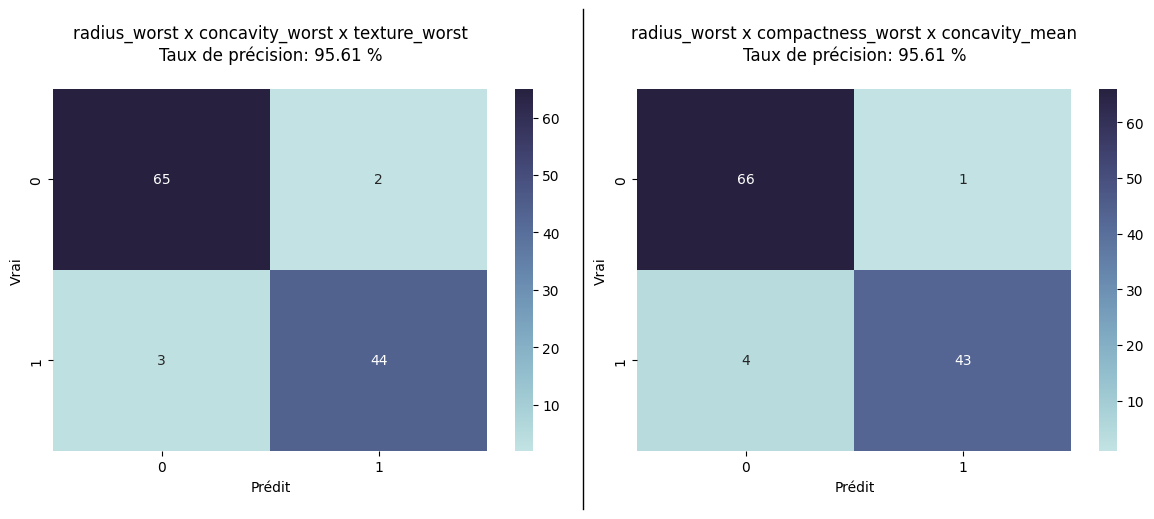

In [26]:
# Variables sélectionnées
selected_triplet = [
    ("radius_worst", "concavity_worst", "texture_worst"),
    ("radius_worst", "compactness_worst", "concavity_mean"),
]

# --- Figure : 1 ligne x 2 colonnes ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, (x_var, y_var, z_var) in enumerate(selected_triplet):
    # --- Données ---
    X = df[[x_var, y_var, z_var]]
    y = df["diagnosis"]

    # --- Séparation train/test ---
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # --- Modèle ---
    model = LogisticRegression(solver='liblinear')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # --- Matrice de confusion ---
    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)

    # --- Affichage ---
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap=sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True),
        ax=axes[i]
    )
    axes[i].set_title(f"{x_var} x {y_var} x {z_var}\nTaux de précision: {round(acc * 100, 2)} %\n")
    axes[i].set_xlabel("Prédit")
    axes[i].set_ylabel("Vrai")


# --- Ajout de lignes de séparation entre les sous-graphes ---
fig_width, fig_height = fig.get_size_inches()
fig.add_artist(plt.Line2D([0.490, 0.490], [0, 1], color="black", linewidth=1))

plt.tight_layout()
plt.show()

#### Classification par 4-uplets

Nous appliquerons toujours le même raisonnement mais pour cette fois ci des 4-uplets.

In [27]:
resultats  = []

for uplet_4 in uplets_4:
    base_x = uplet_4[0].split('_')[0]
    base_y = uplet_4[1].split('_')[0]
    base_z = uplet_4[2].split('_')[0]
    base_t = uplet_4[3].split('_')[0]

    # Garder uniquement si les deux bases sont discriminantes
    if (base_x in discriminant_bases) and (base_y in discriminant_bases) and (base_z in discriminant_bases) and (base_t in discriminant_bases) :
        continue

    # Éviter les comparaisons avec la même base 
    bases = [base_x, base_y, base_z, base_t]
    if (len(set(bases)) < 4) or (base_x, base_y) == ("radius","area"):
        continue

    # --- Données ---
    X = df[[uplet_4[0], uplet_4[1], uplet_4[2], uplet_4[3]]]
    y = df["diagnosis"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # --- Modèle ---
    model = LogisticRegression(solver='liblinear', max_iter=100)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # --- Résultats ---
    acc = accuracy_score(y_test, y_pred)

    if acc > 0.85:
        resultats.append([uplet_4[0], uplet_4[1], uplet_4[2], uplet_4[3], round(acc * 100, 2)])

vec_result = pd.DataFrame(resultats, columns=["Var_1", "Var_2", "Var_3", "Var_4", "Accuracy"]).sort_values(by="Accuracy", ascending=False).head(10)
vec_result

,Var_1,Var_2,Var_3,Var_4,Accuracy
351,radius_worst,concavity_worst,texture_worst,fractal_dimension_mean,95.61
353,radius_worst,concavity_worst,texture_worst,fractal_dimension_worst,95.61
352,radius_worst,concavity_worst,texture_worst,fractal_dimension_se,95.61
273,radius_worst,compactness_worst,concavity_mean,fractal_dimension_mean,95.61
274,radius_worst,compactness_worst,concavity_mean,fractal_dimension_se,95.61
275,radius_worst,compactness_worst,concavity_mean,fractal_dimension_worst,95.61
794,area_worst,concavity_mean,concave points_worst,fractal_dimension_worst,95.61
289,radius_worst,compactness_worst,concave points_worst,fractal_dimension_se,94.74
290,radius_worst,compactness_worst,concave points_worst,fractal_dimension_worst,94.74
807,area_worst,concavity_se,concave points_se,fractal_dimension_mean,94.74


**Sélection du meilleur 4-uplet**

Parmi tous les 4-uplets testés, **le résultat de précision (95.61 %)** est obtenu pour plusieurs combinaisons très proches.  
J’ai décidé de retenir la combinaison suivante :

```python
["radius_worst", "concavity_worst", "texture_worst", "fractal_dimension_worst"]
```

**Pourquoi ce choix ?**

Il atteint le taux de précision le plus élevé parmi toutes les combinaisons testées.\
Avant d'avoir fixé la probabilité (comme set.seed() avec `R`), cette combinaison était à la 1er place !\
Il regroupe quatre variables complémentaires :
- radius_worst → indique la **taille maximale du noyau**
- concavity_worst → mesure la **profondeur des concavités** dans le contour
- texture_worst → reflète **l’hétérogénéité interne** de l’image
- fractal_dimension_worst → mesure fine de **l’irrégularité du contour**


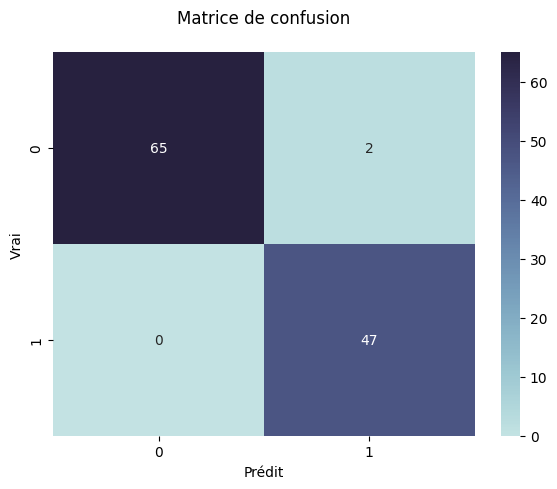

In [28]:
# Variables sélectionnées
selected_vars = ["radius_worst", "concavity_worst", "texture_worst", "fractal_dimension_worst"]

# Séparation des données
X = df[selected_vars]
y = df["diagnosis"]

# Découpage train / test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Modèle
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Évaluation
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Affichage
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap=sns.color_palette("ch:start=.2,rot=-.3",as_cmap=True)
)
plt.xlabel("Prédit")
plt.ylabel("Vrai")
plt.title(f"Matrice de confusion\n")
plt.tight_layout()
plt.show()

### Conclusion : meilleure combinaison de variables pour la classification

Après avoir comparé plusieurs combinaisons de variables à 3 et 4 dimensions, la meilleure performance est obtenue avec la combinaison suivante :

- `radius_worst`, `concavity_worst`, `texture_worst`, `fractal_dimension_worst`  
$\rightarrow$ **Taux de précision : 95.61 %**

### Pourquoi cette combinaison est jugée "meilleure" ?

Au-delà de la précision brute, cette combinaison :
- Présente une **matrice de confusion quasi-parfaite** (0 faux négatifs, seulement 2 faux positifs),
- Regroupe **quatre dimensions d’analyse indépendantes**, ce qui réduit le risque de redondance ou de sur-apprentissage.

### Une méthode d’inférence à partir d’un échantillon

Il est important de rappeler que ces résultats sont obtenus sur un **échantillon de test**, issu d’un découpage aléatoire des données.\
Autrement dit :

> **Nous faisons ici de l’inférence statistique** : on évalue la capacité d’un modèle à généraliser à partir d’un sous-ensemble représentatif des données.

Le taux de précision affiché ne garantit pas des performances identiques sur de nouvelles données. Mais avec des résultats aussi élevés, et une séparation nette entre les classes, on peut raisonnablement estimer que cette combinaison de variables est **robuste et informativement riche** pour la classification.


### Conclusion finale

La combinaison `radius_worst`, `concavity_worst`, `texture_worst`, `fractal_dimension_worst` est donc **la meilleure combinaison identifiée** dans cette étude pour distinguer les tumeurs bénignes et malignes avec une régression logistique simple, tout en respectant un bon équilibre entre performance, diversité des variables et lisibilité des résultats.